## Problem Statement

- The aim is to predict the final grade using several machine learning methods. The objective is to assess how well each algorithm predicts student outcomes using the data it has. The goal is to create a strong predictive model with better accuracy and generalisation capabilities by using advanced machine learning techniques.

In [287]:
import pandas as s
import pandas as p
import matplotlib.pyplot as t
import seaborn as n
%matplotlib inline

### Data Collection

We will first read the data. Load the dataset of student-mat.csv file into a pandas dataframe

In [288]:
stud= s.read_csv('student-mat.csv')   

- The data used comes from a  secondary school. The data set includes the students' academic and personal qualities, as well as their final grades. The aim is to anticipate the final grade based on student information. 

In [289]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [290]:
print('Total students:',len(stud))

Total students: 395


In [291]:

stud['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [292]:
stud.columns    

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [293]:
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [294]:
stud.tail()    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [295]:
stud.isnull().any()    

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

## Data Visualization
- To analyse the data we will do visualization to understatnd the dataset more accurately and then do the cleaning if needed

<Axes: >

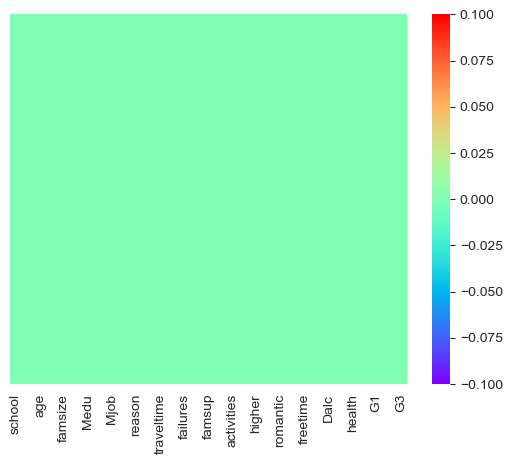

In [296]:
n.heatmap(stud.isnull(),cmap="rainbow",yticklabels=False)

- There are no null values in the given dataset

### Student Age

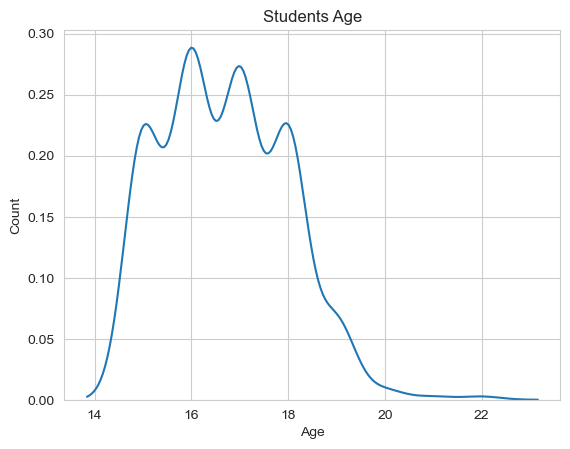

In [297]:
xy = n.kdeplot(stud['age'])    
xy.axes.set_title('Students Age')
xy.set_xlabel('Age')
xy.set_ylabel('Count')
t.show()

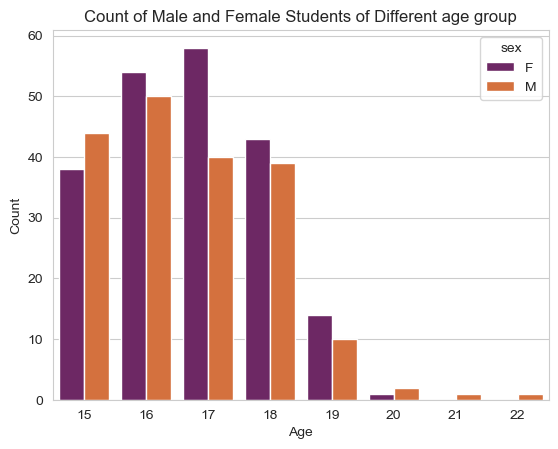

In [298]:
a = n.countplot(x='age',hue='sex', data=stud, palette='inferno')
a.axes.set_title('Count of Male and Female Students of Different age group')
a.set_xlabel("Age")
a.set_ylabel("Count")
t.show()

- Here the age range of students which appear between 15 and 19 represents equal gender distribution in each age group.
- As the age group over 19 may be consist of year-back students, outliers, or can be dropouts.


### Students from Urban & Rural Areas

In [299]:
u_stud = len(stud[stud['address'] == 'U'])    
print('Count of urban students:',u_stud)

r_stud = len(stud[stud['address'] == 'R'])    
print('Count of rural students:',r_stud)

Count of urban students: 307
Count of rural students: 88


<Axes: xlabel='address', ylabel='count'>

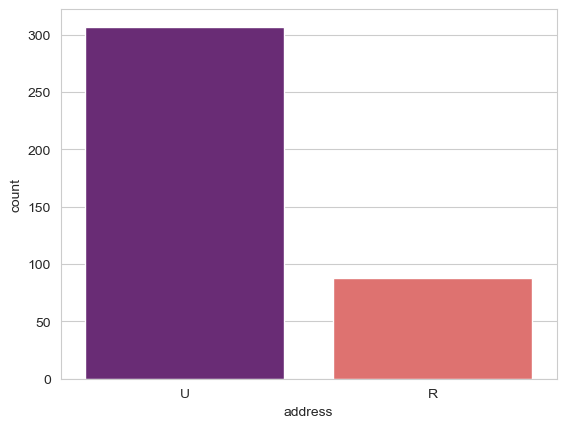

In [300]:
n.set_style('whitegrid')
n.countplot(x='address',data=stud,palette='magma')

- As we can see approximately 77.70% students come from urban region and around 22.00% come from rural region.

<Axes: xlabel='address', ylabel='count'>

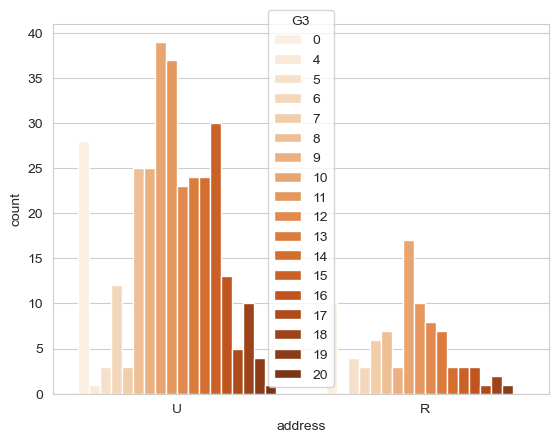

In [301]:
n.countplot(x='address',hue='G3',data=stud,palette='Oranges')

### Data Preprocessing and Feature Engineering

In [303]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
stud.iloc[:,0]=le.fit_transform(stud.iloc[:,0])
stud.iloc[:,1]=le.fit_transform(stud.iloc[:,1])
stud.iloc[:,3]=le.fit_transform(stud.iloc[:,3])
stud.iloc[:,4]=le.fit_transform(stud.iloc[:,4])
stud.iloc[:,5]=le.fit_transform(stud.iloc[:,5])
stud.iloc[:,8]=le.fit_transform(stud.iloc[:,8])
stud.iloc[:,9]=le.fit_transform(stud.iloc[:,9])
stud.iloc[:,10]=le.fit_transform(stud.iloc[:,10])
stud.iloc[:,11]=le.fit_transform(stud.iloc[:,11])
stud.iloc[:,15]=le.fit_transform(stud.iloc[:,15])
stud.iloc[:,16]=le.fit_transform(stud.iloc[:,16])
stud.iloc[:,17]=le.fit_transform(stud.iloc[:,17])
stud.iloc[:,18]=le.fit_transform(stud.iloc[:,18])
stud.iloc[:,19]=le.fit_transform(stud.iloc[:,19])
stud.iloc[:,20]=le.fit_transform(stud.iloc[:,20])
stud.iloc[:,21]=le.fit_transform(stud.iloc[:,21])
stud.iloc[:,22]=le.fit_transform(stud.iloc[:,22])

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [304]:
stud.corr()['G3'].sort_values()    

failures     -0.360415
age          -0.161579
goout        -0.132791
romantic     -0.129970
traveltime   -0.117142
schoolsup    -0.082788
guardian     -0.070109
health       -0.061335
Pstatus      -0.058009
Dalc         -0.054660
Walc         -0.051939
school       -0.045017
famsup       -0.039157
freetime      0.011307
activities    0.016100
absences      0.034247
Fjob          0.042286
famrel        0.051363
nursery       0.051568
famsize       0.081407
studytime     0.097820
internet      0.098483
paid          0.101996
Mjob          0.102082
sex           0.103456
address       0.105756
reason        0.121994
Fedu          0.152457
higher        0.182465
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [305]:
stud = stud.drop(['school', 'G1', 'G2'], axis='columns')

- As G1 and G2 which is correlated to the final grade G3, we will drop them. Its more difficult to predict G3 with missing G2 and G1.

In [306]:
most_correlated = stud.corr().abs()['G3'].sort_values(ascending=False)


most_correlated = most_correlated[:9]
most_correlated


G3          1.000000
failures    0.360415
Medu        0.217147
higher      0.182465
age         0.161579
Fedu        0.152457
goout       0.132791
romantic    0.129970
reason      0.121994
Name: G3, dtype: float64

In [307]:
stud = stud.loc[:, most_correlated.index]
stud.head()

,G3,failures,Medu,higher,age,Fedu,goout,romantic,reason
0,6,0,4,1,18,4,4,0,0
1,6,0,1,1,17,1,3,0,0
2,10,3,1,1,15,1,2,0,2
3,15,0,4,1,15,2,2,1,1
4,10,0,3,1,16,3,2,0,1


In [310]:
X_train, X_test, y_train, y_test = train_test_split(stud, stud['G3'], test_size = 0.25, random_state=42)

- Splited the data into training and testing data (75% and 25%)

In [311]:
X_train.head()

,G3,failures,Medu,higher,age,Fedu,goout,romantic,reason
16,14,0,4,1,16,4,3,0,3
66,12,0,4,1,15,4,3,1,3
211,13,0,4,1,17,4,5,1,1
7,6,0,4,1,17,4,4,0,1
19,10,0,4,1,16,3,3,0,1


## Machine Learning Algorithms

In [312]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

import scipy

#### Model Traning

In [313]:
import pandas as pd
from sklearn.model_selection import train_test_split

features = ['failures', 'Medu', 'higher', 'age', 'Fedu', 'goout', 'romantic', 'reason']
target = 'G3'

X = stud[features]
y = stud[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (316, 8) (316,)
Testing set shape: (79, 8) (79,)


In [314]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)
svm = SVR()

linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
svm.fit(X_train, y_train)

linear_reg_pred = linear_reg.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
gradient_boosting_pred = gradient_boosting.predict(X_test)
svm_pred = svm.predict(X_test)

linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
linear_reg_r2 = r2_score(y_test, linear_reg_pred)

random_forest_mae = mean_absolute_error(y_test, random_forest_pred)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)
random_forest_r2 = r2_score(y_test, random_forest_pred)

gradient_boosting_mae = mean_absolute_error(y_test, gradient_boosting_pred)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_pred)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_pred)

svm_mae = mean_absolute_error(y_test, svm_pred)
svm_mse = mean_squared_error(y_test, svm_pred)
svm_r2 = r2_score(y_test, svm_pred)

print("Linear Regression:")
print("MAE:", linear_reg_mae)
print("MSE:", linear_reg_mse)
print("R-squared:", linear_reg_r2)
print()

print("Random Forest:")
print("MAE:", random_forest_mae)
print("MSE:", random_forest_mse)
print("R-squared:", random_forest_r2)
print()

print("Gradient Boosting:")
print("MAE:", gradient_boosting_mae)
print("MSE:", gradient_boosting_mse)
print("R-squared:", gradient_boosting_r2)
print()

print("Support Vector Machine:")
print("MAE:", svm_mae)
print("MSE:", svm_mse)
print("R-squared:", svm_r2)


Linear Regression:
MAE: 3.272752301846853
MSE: 17.56310815821713
R-squared: 0.14347390042014585

Random Forest:
MAE: 3.590729957805908
MSE: 20.278035098768623
R-squared: 0.011071038575509062

Gradient Boosting:
MAE: 3.5181381535981933
MSE: 19.846942671741157
R-squared: 0.03209476124201738

Support Vector Machine:
MAE: 3.401352808409564
MSE: 18.444235352589967
R-squared: 0.10050266593071955


In [315]:
metrics = {
    'Linear Regression': {'MAE': linear_reg_mae, 'MSE': linear_reg_mse, 'R-squared': linear_reg_r2},
    'Random Forest': {'MAE': random_forest_mae, 'MSE': random_forest_mse, 'R-squared': random_forest_r2},
    'Gradient Boosting': {'MAE': gradient_boosting_mae, 'MSE': gradient_boosting_mse, 'R-squared': gradient_boosting_r2},
    'Support Vector Machine': {'MAE': svm_mae, 'MSE': svm_mse, 'R-squared': svm_r2}
}


best_model = min(metrics, key=lambda x: (metrics[x]['MAE'], metrics[x]['MSE'], -metrics[x]['R-squared']))
print("Best Model:", best_model)


Best Model: Linear Regression


#### MAE - Mean Absolute Error & RMSE - Root Mean Square Error

In [316]:
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [317]:
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Meam Absoluate Error: {:.4f}'.format(mb_mae))
print('Root Mean Square Error: {:.4f}'.format(mb_rmse))

Meam Absoluate Error: 3.7879
Root Mean Square Error: 4.8252


### Conclusion
- The results makes clear that linear regression is the best model for predicting final grades based on student data based on the evaluation metrics of Model Mean Absolute Error with a value of 3.7879, Model Root Mean Squared Error with a value of 4.8252, and an R-squared with 0.1435. The linear regression model gives accuracy because the prediction is closer to the actual values. Therefour, considering the complexity and variety in student performance, the R-squared value of 0.1435 indicates that the linear regression model can account for about 14.35% of the variability in the final grades. This is rather substantial. 